In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import graphviz
import seaborn as sns; sns.set()
from sklearn.linear_model import SGDClassifier 
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, ParameterGrid
from sklearn.metrics import *
import time


%matplotlib inline

In [2]:
cd code

/Users/tianchushu/Desktop/syntaxerror-mlpp2018/code


In [3]:
import final_connection
import final_default_grids
import final_explore_and_viz
import final_load_dfs
import final_plot
import final_preprocessing
import final_temporal
import indpv_lists as final_options
import jocojims
import final_classifier_final

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [4]:
# LOADS CSV WITH MERGED DATA WITH ACS
df = final_load_dfs.load_from_file('FINAL.csv')

#Save a clean copy for later viz purpose
viz_df = df.copy()

# FINDING BASE PROBABILITY OF RE-ENTRY
print ('Prob of re-entry within one year')
print (df['within_one'].sum()/df.shape[0])
print ('Prob of re-entry within two year')
print (df['within_two'].sum()/df.shape[0])
print (' ')


LoadedFINAL.csv
Prob of re-entry within one year
0.21966193263209594
Prob of re-entry within two year
0.2725821634674416
 


In [5]:
# DROPPING COLUMNS NOT USED IN ANALYSIS
print('DROPPING THESE COLUMNS: ', jocojims.DROP_COLS)
df = df.drop(jocojims.DROP_COLS, axis = 1)
print (' ')

# CREATING DUMMIES
print ('The following columns have been broken into dummies:' , jocojims.DUMMIES)
for dummy in jocojims.DUMMIES:
    df = final_preprocessing.dummy_variable(dummy, df)
print (' ')

# DISCRETIZATION
for category in jocojims.CATS:
    df = final_preprocessing.bin_gen(df, category, '_bin', 'suffix' )
print ('Discretizing the following variables: ', jocojims.CATS)
print (' ')

DROPPING THESE COLUMNS:  ['re_entry', 'mni_no', 'dedupe_id', 'dob', 'state', 'city', 'zip', 'release_date', 'case_no', 'booking_no', 'after_released']
 
The following columns have been broken into dummies: ['sex', 'race', 'mar_stat', 'case_type', 'arresting_agency', 'arresting_agency_type', 'bail_type', 'pri_dx_value', 'refferal_source']
 
Discretizing the following variables:  ['age', 'per_capita_income', 'poverty_stat', 'household_income', 'mortgage_stat', 'school_enrollment_16-19', 'own_children_under18', 'SSI_income', 'grandparent_care', 'military_service', 'education_25', 'property_value_occupied', 'retirement_income', 'rent_over_income', 'bail_amt']
 


In [6]:
df.columns

Index(['booking_date', 'bailed_out', 'mh_treatment', 'within_one',
       'within_two', 'sexFEMALE', 'sexMALE', 'sexmissing',
       'raceAMERICAN INDIAN OR ALASKA NATIVE', 'raceASIAN',
       ...
       'retirement_income_bin3', 'retirement_income_bin4',
       'rent_over_income_bin1', 'rent_over_income_bin2',
       'rent_over_income_bin3', 'rent_over_income_bin4', 'bail_amt_bin1',
       'bail_amt_bin2', 'bail_amt_bin3', 'bail_amt_bin4'],
      dtype='object', length=311)

In [7]:
# SETTING DATES FOR SEPARATING TRAIN & TESTING DATA
end =  df['booking_date'].max()[:10]
start =  df['booking_date'].min()[:10]
middle_date = '2015-07-01'

# SPLITTING DATASET INTO TRAINING AND TESTING
train, test = final_temporal.temporal_split(df, 'booking_date', start, middle_date, end)
trainv,testv = final_temporal.temporal_split(viz_df, 'booking_date', start, middle_date, end)


# SPLITTING DEPENDENT AND INDEPENDENT VARIABLES
# within_one == come back within one year
# within_two == come back within two year
y = ['within_one', 'within_two']
x_train, x_test, y_train, y_test = final_temporal.split_data(train, test, y)

a, viz_x, b, c = final_temporal.split_data(trainv,testv, y)

In [8]:
final_options.mh_info

['mar_statA',
 'mar_statD',
 'mar_statM',
 'mar_statN',
 'mar_statS',
 'mar_statU',
 'mar_statW',
 'mar_statY',
 'mar_statmissing',
 'age_bin1',
 'age_bin2',
 'age_bin3',
 'age_bin4',
 'own_children_under18_bin1',
 'own_children_under18_bin2',
 'own_children_under18_bin3',
 'own_children_under18_bin4',
 'grandparent_care_bin1',
 'grandparent_care_bin2',
 'grandparent_care_bin3',
 'grandparent_care_bin4',
 'military_service_bin1',
 'military_service_bin2',
 'military_service_bin3',
 'military_service_bin4',
 'raceAMERICAN INDIAN OR ALASKA NATIVE',
 'raceASIAN',
 'raceBLACK OR AFRICAN AMERICAN',
 'raceWHITE',
 'sexFEMALE',
 'sexMALE',
 'sexmissing',
 'per_capita_income_bin1',
 'per_capita_income_bin2',
 'per_capita_income_bin3',
 'per_capita_income_bin4',
 'poverty_stat_bin1',
 'poverty_stat_bin2',
 'poverty_stat_bin3',
 'poverty_stat_bin4',
 'household_income_bin1',
 'household_income_bin2',
 'household_income_bin3',
 'household_income_bin4',
 'mortgage_stat_bin1',
 'mortgage_stat_bin2'

In [9]:
#Running on mental health var
x_train = x_train[final_options.mh_info]
x_test = x_test[final_options.mh_info]

In [10]:
results = final_classifier_final.clf_loop(["RF", 'Boost', 'Bag', 'Logit', 'Tree', 'ET', 'NB'], x_train, x_test, y_train['within_one'], y_test['within_one'])

In [11]:
best = final_classifier_final.best_grid(results)

,model_type,parameters,auc-roc,precision,time,"precision,recall,f1 at_5","precision,recall,f1 at_10","precision,recall,f1 at_20"
27,Bag,"{'max_features': 5, 'max_samples': 5, 'n_estim...",0.6396,0.3084,0.1393,"(0.4835, 0.1209, 0.1934)","(0.4011, 0.2005, 0.2674)","(0.3214, 0.3214, 0.3214)"
22,Boost,"{'algorithm': 'SAMME.R', 'n_estimators': 100}",0.6791,0.3840,2.8606,"(0.5495, 0.1374, 0.2198)","(0.5137, 0.2569, 0.3425)","(0.4341, 0.4341, 0.4341)"
99,ET,"{'criterion': 'entropy', 'max_depth': 5, 'max_...",0.6686,0.3619,0.7750,"(0.489, 0.1223, 0.1956)","(0.4231, 0.2115, 0.2821)","(0.4203, 0.4203, 0.4203)"
45,Logit,"{'C': 0.1, 'penalty': 'l2'}",0.6766,0.3786,0.2093,"(0.522, 0.1305, 0.2088)","(0.4753, 0.2376, 0.3168)","(0.4217, 0.4217, 0.4217)"
114,NB,{},0.6648,0.3471,0.1971,"(1.0, 0.25, 0.4)","(0.7088, 0.3544, 0.4725)","(0.4299, 0.4299, 0.4299)"
15,RF,"{'max_depth': 50, 'max_features': 'log2', 'min...",0.6731,0.3914,2.2937,"(0.5714, 0.1429, 0.2286)","(0.4808, 0.2404, 0.3205)","(0.4011, 0.4011, 0.4011)"
73,Tree,"{'criterion': 'entropy', 'max_depth': 10, 'max...",0.6697,0.3557,0.0550,"(0.5275, 0.1319, 0.211)","(0.489, 0.2445, 0.326)","(0.4148, 0.4148, 0.4148)"


In [12]:
#best

In [13]:
df_sorting = final_classifier_final.finding_risk_scores(x_train, x_test, y_train['within_one'], y_test['within_one'], best, viz_x)

Bag
Boost
ET
Logit
NB
RF
Tree


In [14]:
#Use the best performed Random Forest model to see the top 10% at risk people's data

In [15]:
RF_df = df_sorting.sort_values(by=['RF'], ascending=False)

In [16]:
RF_df.columns

Index(['SSI_income', 'after_released', 'age', 'arresting_agency',
       'arresting_agency_type', 'bail_amt', 'bail_type', 'bailed_out',
       'booking_no', 'case_no', 'case_type', 'city', 'dedupe_id', 'dob',
       'education_25', 'grandparent_care', 'household_income', 'mar_stat',
       'mh_treatment', 'military_service', 'mni_no', 'mortgage_stat',
       'own_children_under18', 'per_capita_income', 'poverty_stat',
       'pri_dx_value', 'property_value_occupied', 'race', 're_entry',
       'refferal_source', 'release_date', 'rent_over_income',
       'retirement_income', 'school_enrollment_16-19', 'sex', 'state', 'zip',
       'Bag', 'Boost', 'ET', 'Logit', 'NB', 'RF', 'Tree'],
      dtype='object')

In [17]:
RF_df[:200]

,SSI_income,after_released,age,arresting_agency,arresting_agency_type,bail_amt,bail_type,bailed_out,booking_no,case_no,...,sex,state,zip,Bag,Boost,ET,Logit,NB,RF,Tree
5462,1130,-78.0,19.0,LENEXA P.D.,CITY,10000.0,PR,1,15013832,15CR02931,...,MALE,KS,66215,0.187667,0.502986,0.522110,0.718969,1.0,0.952211,0.579090
3165,475,-4.0,19.0,OLATHE P.D.,CITY,NaN,SUR,0,15011447,15DV01254,...,FEMALE,KS,66061,0.219333,0.502824,0.510209,0.687963,1.0,0.935847,0.570946
6323,437,159.0,30.0,OLATHE P.D.,CITY,10000.0,PR,1,15010904,15CR02234,...,MALE,KS,66202,0.237667,0.501100,0.451983,0.625554,1.0,0.918856,0.579090
6324,437,-37.0,30.0,OLATHE P.D.,CITY,10000.0,PR,1,15010904,15CR02234,...,MALE,KS,66202,0.237667,0.502982,0.528481,0.732708,1.0,0.902647,0.579090
631,407,-67.0,20.0,OLATHE P.D.,CITY,NaN,SUR,0,15008201,15DV00912,...,FEMALE,KS,66062,0.251000,0.589993,0.449705,0.624651,1.0,0.894122,0.570946
8468,591,-127.0,40.0,OVERLAND PARK P.D.,CITY,NaN,SUR,0,15007735,15CR01572,...,FEMALE,KS,66204,0.221000,0.501876,0.473744,0.675657,1.0,0.884978,0.782609
5463,1130,-78.0,19.0,LENEXA P.D.,CITY,10000.0,PR,1,15013832,15CR02931,...,MALE,KS,66215,0.187667,0.502366,0.514102,0.715910,1.0,0.881284,0.739130
22489,354,-38.0,19.0,OLATHE P.D.,CITY,2500.0,PR,1,15010014,15CR02059,...,MALE,KS,67201,0.197667,0.500721,0.355305,0.501595,1.0,0.871436,0.131878
7299,456,-1.0,23.0,OVERLAND PARK P.D.,CITY,3500.0,PR,1,16003241,16CR00734,...,MALE,KS,66212,0.239333,0.505146,0.501724,0.763325,1.0,0.862996,0.579090
3307,475,-22.0,24.0,OVERLAND PARK P.D.,CITY,5000.0,PR,1,15009828,15CR01999,...,MALE,KS,66061,0.226000,0.502168,0.443983,0.697183,1.0,0.862882,0.570946


In [18]:
features_to_see = ['bail_amt', 'bail_type', 'bailed_out','case_type', 'city', 
       'education_25', 'grandparent_care', 'household_income', 'mar_stat',
       'mh_treatment', 'military_service', 'mortgage_stat',
       'own_children_under18', 'per_capita_income', 'poverty_stat',
       'property_value_occupied', 'race', 're_entry', 'rent_over_income']

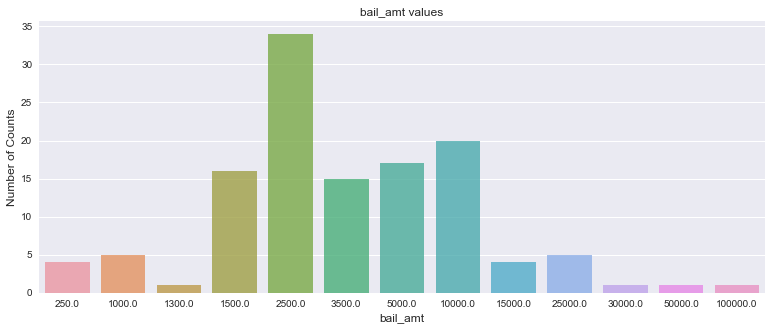

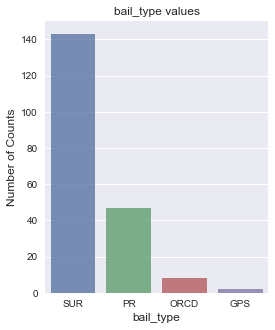

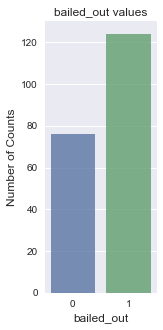

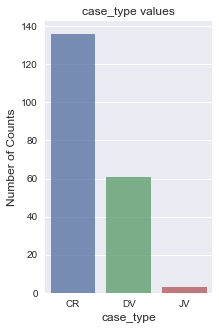

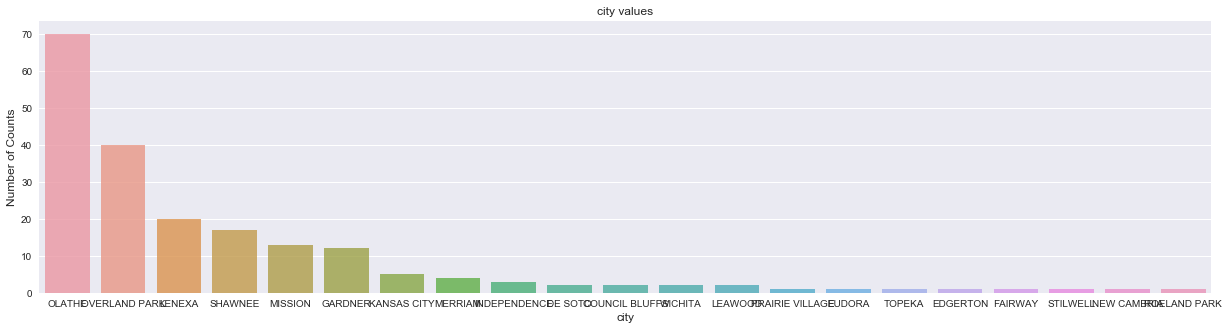

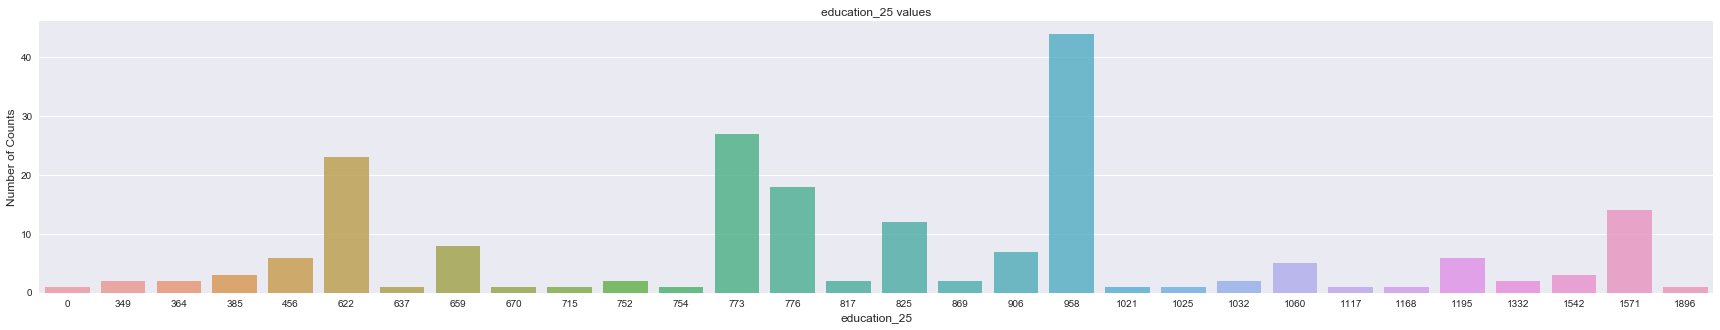

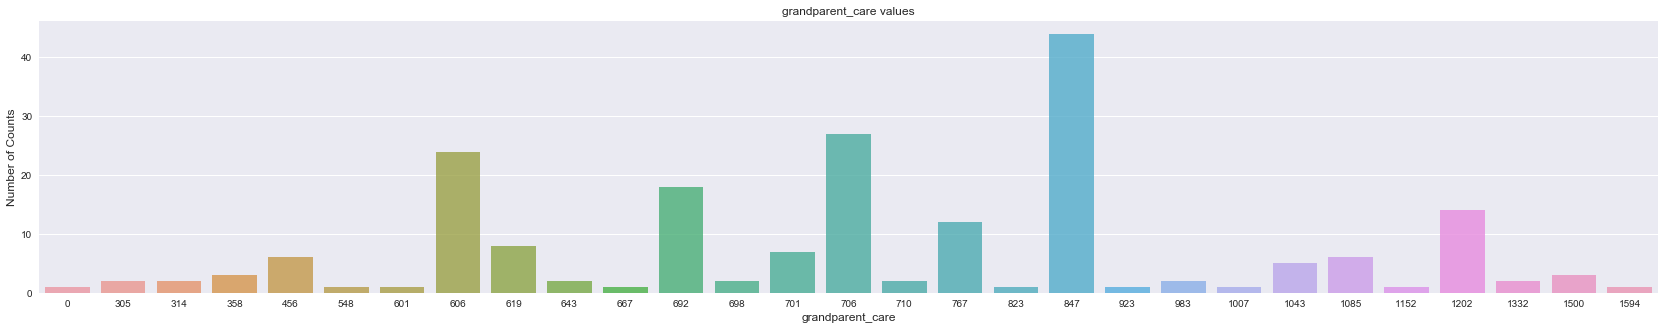

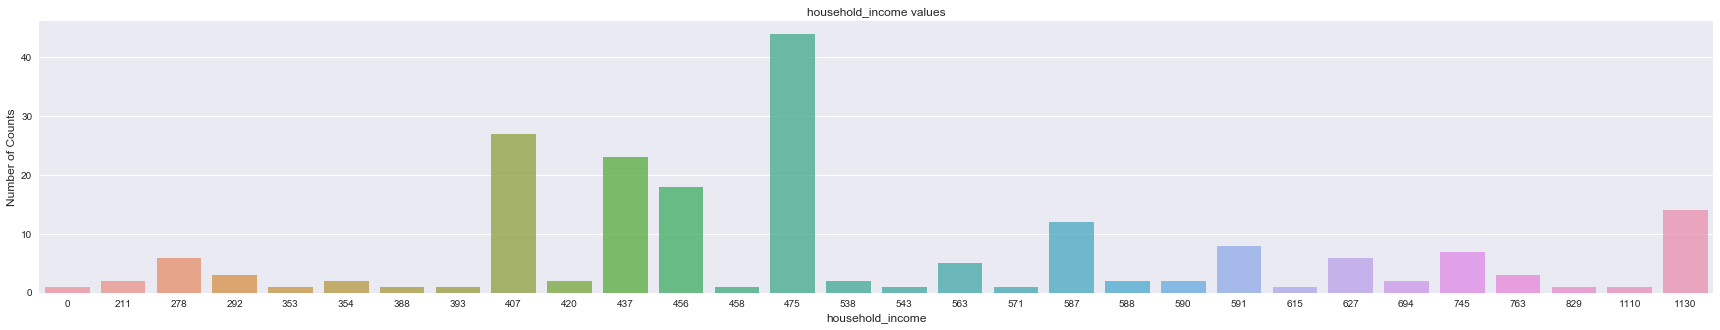

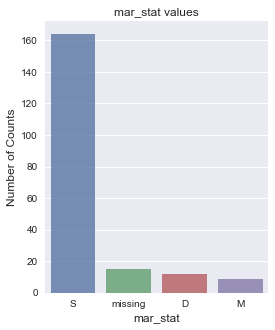

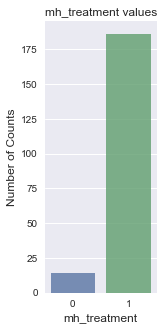

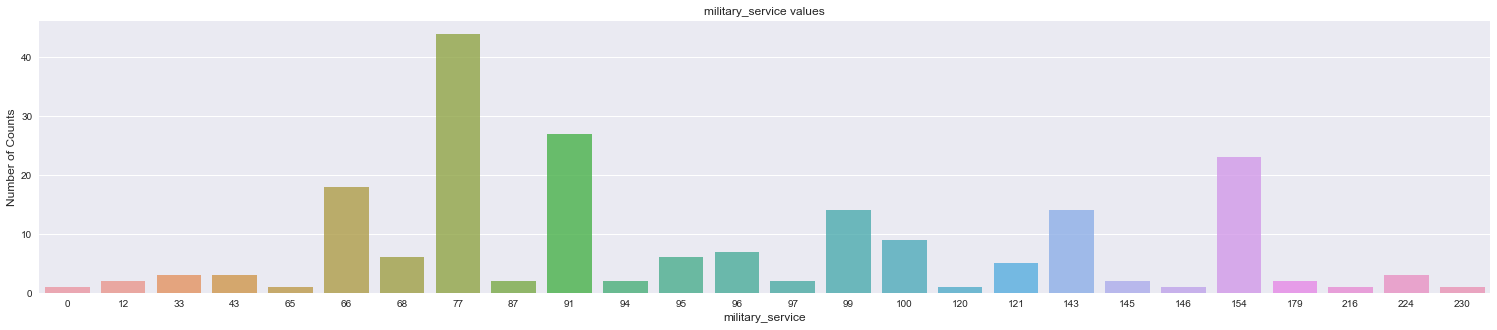

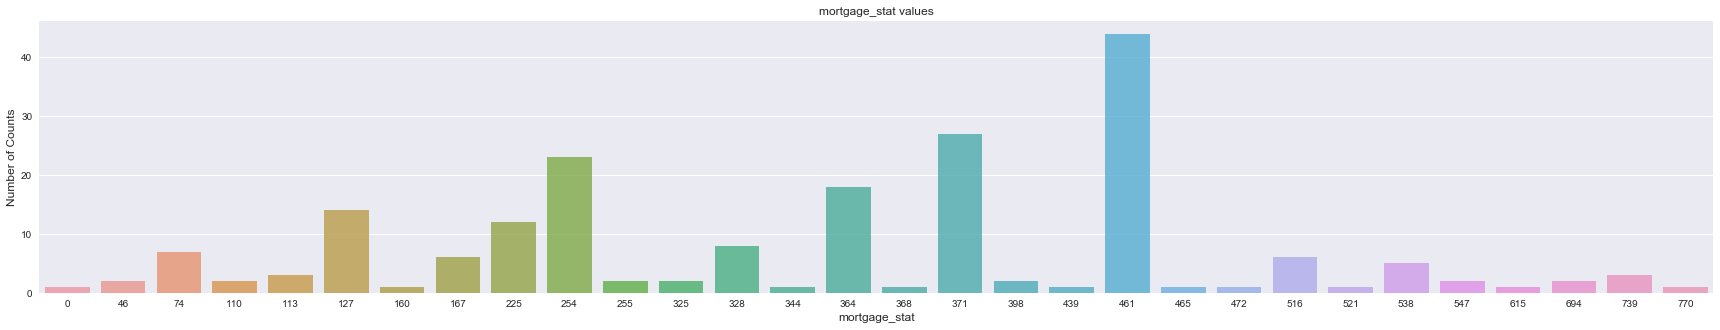

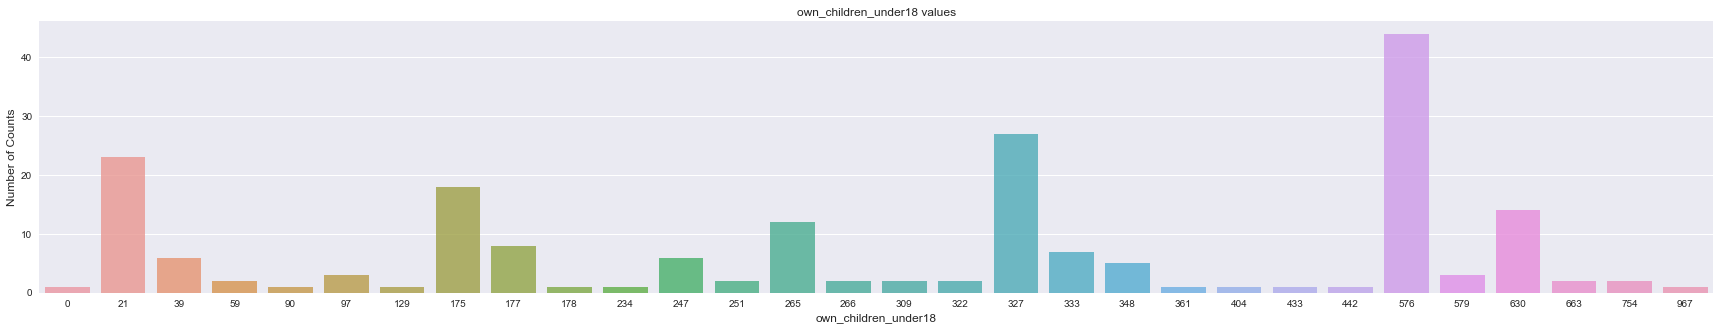

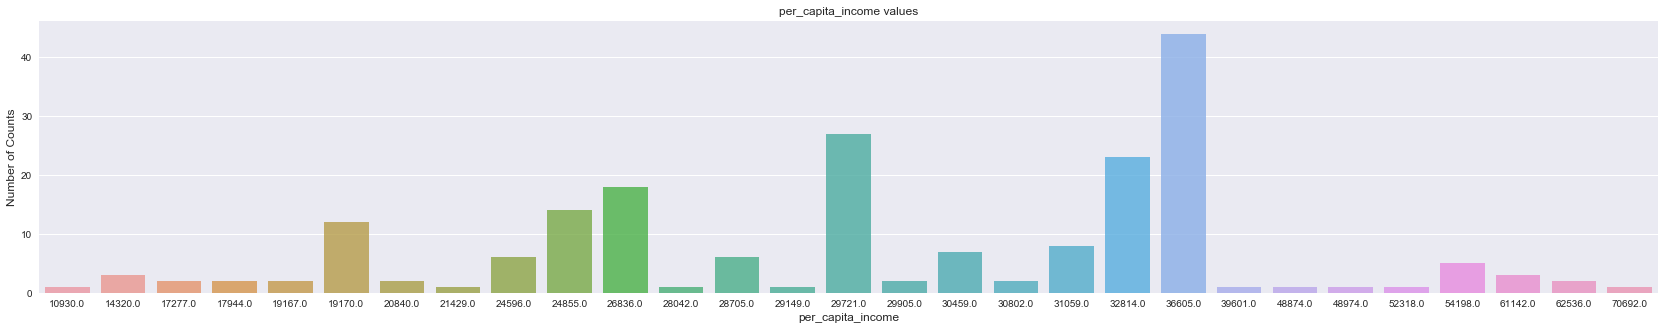

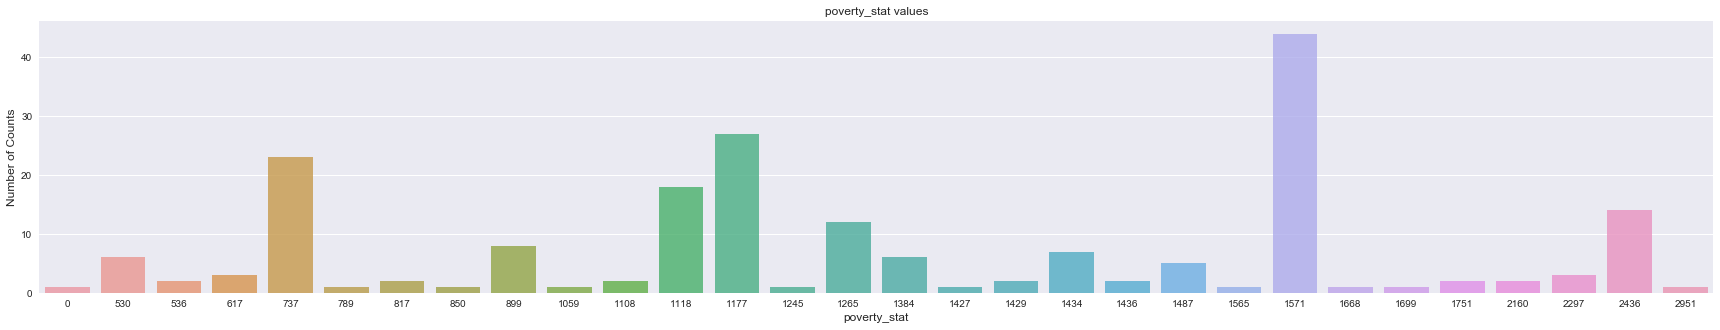

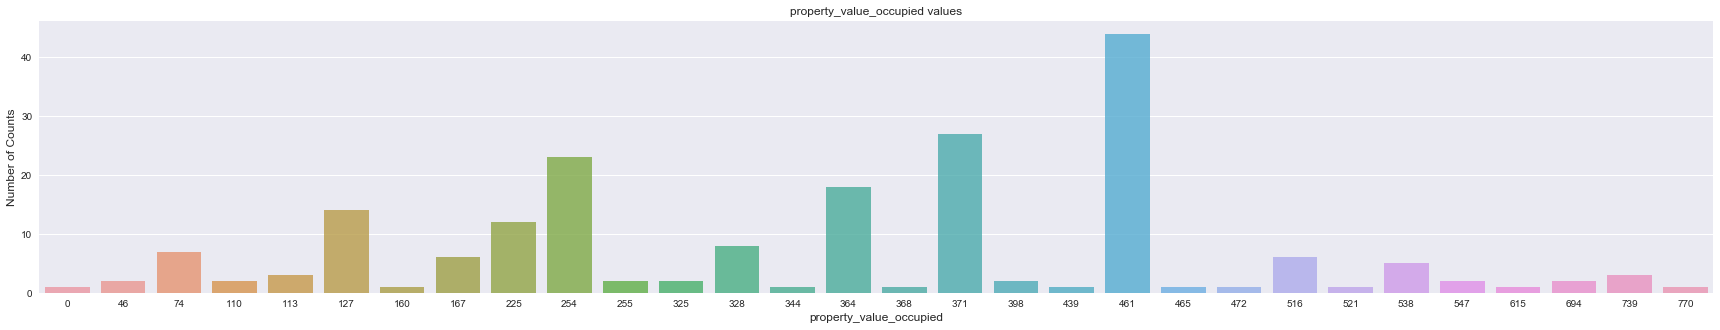

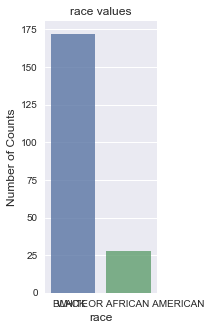

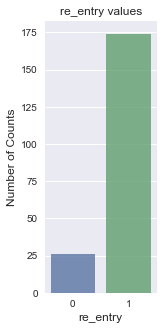

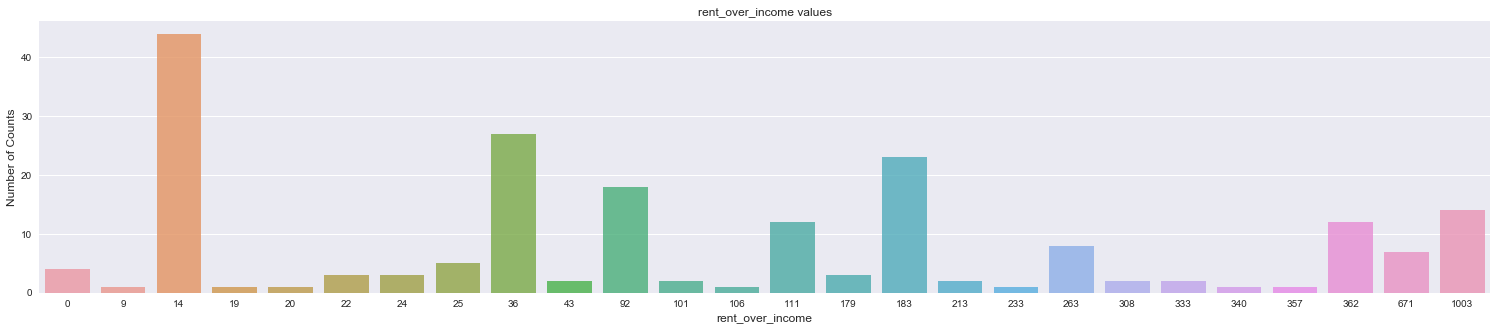

In [19]:
final_plot.plot_df(RF_df[:200], features_to_see, save=False)

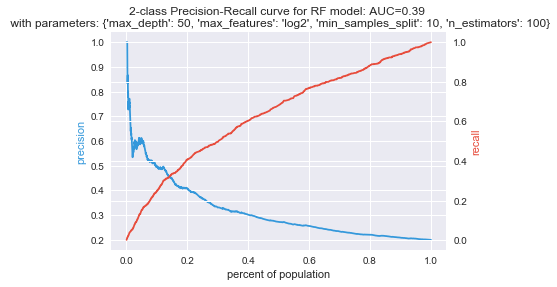

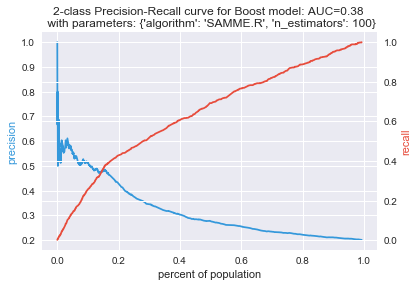

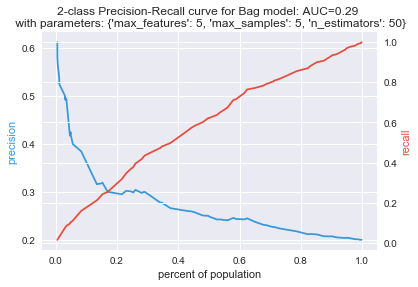

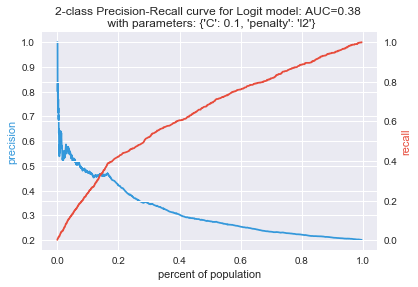

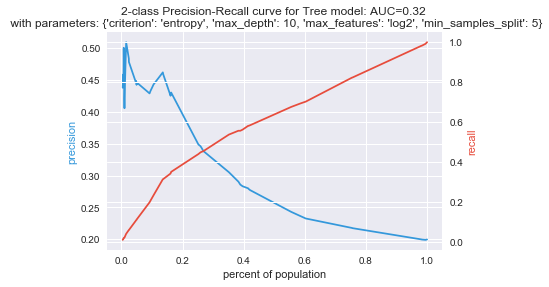

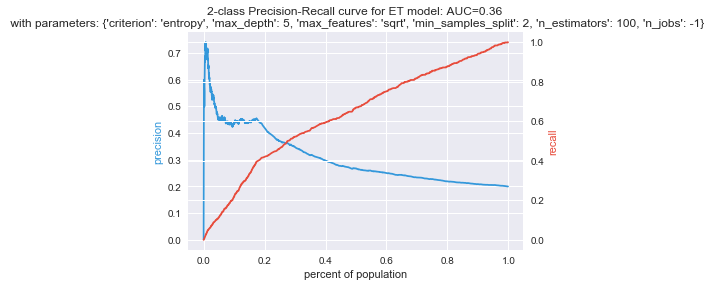

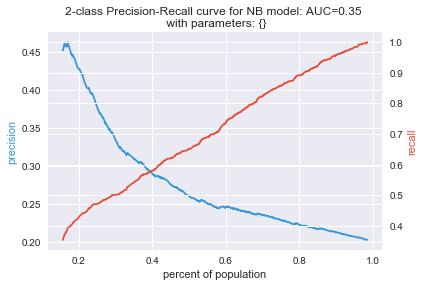

In [20]:
final_plot.plot_best(["RF", "Boost", "Bag", "Logit", "Tree",  "ET", "NB"],  x_train, x_test, y_train['within_one'], y_test['within_one'], best)

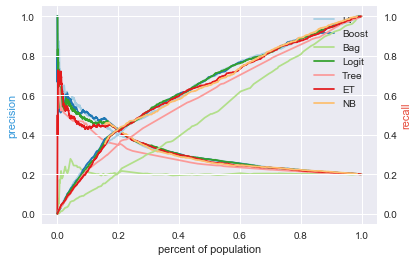

In [21]:
final_plot.plot_mult(['RF', 'Boost', 'Bag','Logit', 'Tree', 'ET', 'NB'], x_train, x_test, y_train['within_one'], y_test['within_one'], best)

Feature ranking for within_one
1. mh_treatment (0.314642)
2. pri_dx_valueUNSPECIFIED AFFECTIVE PSYCHOSIS (0.197642)
3. refferal_sourceOTHERS (0.135053)
4. refferal_sourceSELF (0.052483)
5. age_bin1 (0.041427)
6. pri_dx_valuemissing (0.030502)
7. pri_dx_valueMANIC DEPRESSIVE PSYCHOSIS, UNSPECIFIED (0.016369)
8. age_bin4 (0.013818)
9. mar_statM (0.013209)
10. pri_dx_valueDEPRESSIVE DISORDER NOS (0.012290)
11. mar_statS (0.012257)
12. pri_dx_valueUNSPECIFIED PSYCHOSIS (0.011500)
13. pri_dx_valueSCHIZOPHRENIC DISORDER, SCHIZO-AFFECTIVE TYPE, UNSPEC (0.010698)
14. per_capita_income_bin3 (0.008084)
15. per_capita_income_bin1 (0.007116)
16. household_income_bin2 (0.006908)
17. pri_dx_valueMAJOR DEPRESSIVE DISORDER, RECURRENT, MODERATE (0.005502)
18. SSI_income_bin2 (0.005208)
19. military_service_bin1 (0.005015)
20. grandparent_care_bin1 (0.004328)


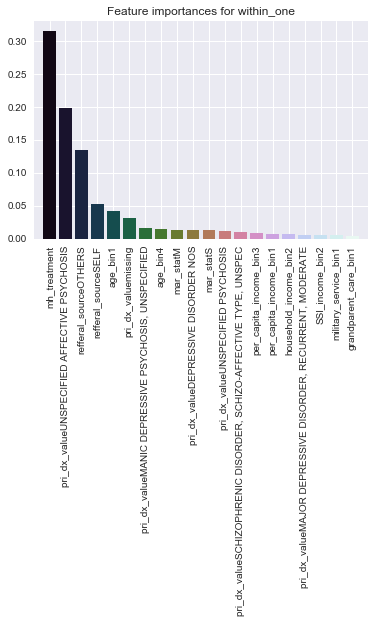

In [22]:
final_plot.feature_importance(x_train, y_train['within_one'], best, "ET", 20)

In [23]:
########Running everything on second y within two year of re-entry

In [24]:
results2 = final_classifier_final.clf_loop(["RF", 'Boost', 'Bag', 'Logit', 'Tree', 'ET', 'NB'], x_train, x_test, y_train['within_two'], y_test['within_two'])

In [25]:
best2 = final_classifier_final.best_grid(results2)

,model_type,parameters,auc-roc,precision,time,"precision,recall,f1 at_5","precision,recall,f1 at_10","precision,recall,f1 at_20"
35,Bag,"{'max_features': 10, 'max_samples': 5, 'n_esti...",0.5768,0.3139,0.1441,"(0.3571, 0.0692, 0.116)","(0.3214, 0.1246, 0.1796)","(0.3613, 0.2801, 0.3155)"
18,Boost,"{'algorithm': 'SAMME', 'n_estimators': 100}",0.6685,0.4283,2.9182,"(0.5989, 0.1161, 0.1945)","(0.5302, 0.2055, 0.2962)","(0.5179, 0.4015, 0.4523)"
97,ET,"{'criterion': 'gini', 'max_depth': 50, 'max_fe...",0.6714,0.4433,1.6555,"(0.6154, 0.1193, 0.1998)","(0.5714, 0.2215, 0.3193)","(0.4973, 0.3855, 0.4343)"
46,Logit,"{'C': 1, 'penalty': 'l1'}",0.6660,0.4426,1.2863,"(0.6429, 0.1246, 0.2087)","(0.5879, 0.2279, 0.3285)","(0.5055, 0.3919, 0.4415)"
114,NB,{},0.6528,0.4088,0.2006,"(1.0, 0.1938, 0.3247)","(0.7308, 0.2833, 0.4083)","(0.511, 0.3962, 0.4463)"
15,RF,"{'max_depth': 50, 'max_features': 'log2', 'min...",0.6736,0.4577,2.4637,"(0.6154, 0.1193, 0.1998)","(0.5879, 0.2279, 0.3285)","(0.5082, 0.394, 0.4439)"
73,Tree,"{'criterion': 'entropy', 'max_depth': 10, 'max...",0.6640,0.4148,0.0357,"(0.6813, 0.1321, 0.2212)","(0.5687, 0.2204, 0.3177)","(0.511, 0.3962, 0.4463)"


In [26]:
best2

{'Bag': {'max_features': [10], 'max_samples': [5], 'n_estimators': [50]},
 'Boost': {'algorithm': ['SAMME'], 'n_estimators': [100]},
 'ET': {'criterion': ['gini'],
  'max_depth': [50],
  'max_features': ['log2'],
  'min_samples_split': [10],
  'n_estimators': [100],
  'n_jobs': [-1]},
 'Logit': {'C': [1], 'penalty': ['l1']},
 'NB': {},
 'RF': {'max_depth': [50],
  'max_features': ['log2'],
  'min_samples_split': [10],
  'n_estimators': [100]},
 'Tree': {'criterion': ['entropy'],
  'max_depth': [10],
  'max_features': ['log2'],
  'min_samples_split': [5]}}

In [27]:
df_sorting2 = final_classifier_final.finding_risk_scores(x_train, x_test, y_train['within_two'], y_test['within_two'], best2, viz_x)

Bag
Boost
ET
Logit
NB
RF
Tree


In [28]:
RF_df2 = df_sorting2.sort_values(by=['RF'], ascending=False)

In [29]:
RF_df2[:200]

,SSI_income,after_released,age,arresting_agency,arresting_agency_type,bail_amt,bail_type,bailed_out,booking_no,case_no,...,sex,state,zip,Bag,Boost,ET,Logit,NB,RF,Tree
5462,1130,-78.0,19.0,LENEXA P.D.,CITY,10000.0,PR,1,15013832,15CR02931,...,MALE,KS,66215,0.256333,0.520799,1.000000,0.807947,1.000000e+00,0.975953,1.000000
3165,475,-4.0,19.0,OLATHE P.D.,CITY,NaN,SUR,0,15011447,15DV01254,...,FEMALE,KS,66061,0.249667,0.515563,0.979436,0.877531,1.000000e+00,0.958789,1.000000
533,407,-41.0,19.0,OLATHE P.D.,CITY,NaN,SUR,0,15011296,15DV01231,...,MALE,KS,66062,0.216333,0.522311,0.933030,0.763640,1.000000e+00,0.934758,0.801170
6323,437,159.0,30.0,OLATHE P.D.,CITY,10000.0,PR,1,15010904,15CR02234,...,MALE,KS,66202,0.208000,0.519283,0.952792,0.680818,1.000000e+00,0.932046,0.685146
6324,437,-37.0,30.0,OLATHE P.D.,CITY,10000.0,PR,1,15010904,15CR02234,...,MALE,KS,66202,0.208000,0.519283,0.925841,0.803500,1.000000e+00,0.931966,0.685146
22488,354,488.0,19.0,OLATHE P.D.,CITY,2500.0,PR,1,15010014,15CR02059,...,MALE,KS,67201,0.226333,0.520652,0.974286,0.668839,1.000000e+00,0.928019,0.685146
22489,354,-38.0,19.0,OLATHE P.D.,CITY,2500.0,PR,1,15010014,15CR02059,...,MALE,KS,67201,0.226333,0.520652,0.972639,0.613257,9.564622e-21,0.925605,0.221374
7298,456,943.0,23.0,OVERLAND PARK P.D.,CITY,3500.0,PR,1,16003241,16CR00734,...,MALE,KS,66212,0.183000,0.521154,0.951536,0.837940,1.000000e+00,0.922491,0.685146
5463,1130,-78.0,19.0,LENEXA P.D.,CITY,10000.0,PR,1,15013832,15CR02931,...,MALE,KS,66215,0.256333,0.520980,0.985794,0.777997,1.000000e+00,0.915217,0.801170
7299,456,-1.0,23.0,OVERLAND PARK P.D.,CITY,3500.0,PR,1,16003241,16CR00734,...,MALE,KS,66212,0.183000,0.521154,0.939312,0.896998,1.000000e+00,0.914860,0.685146


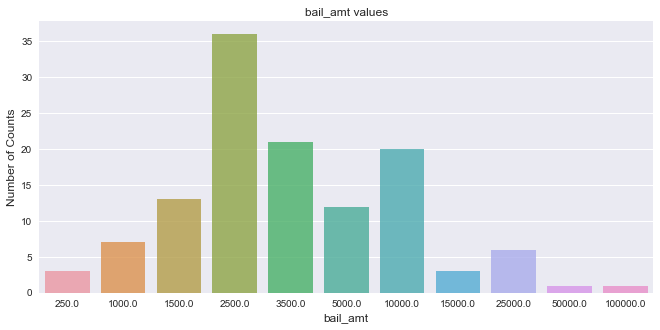

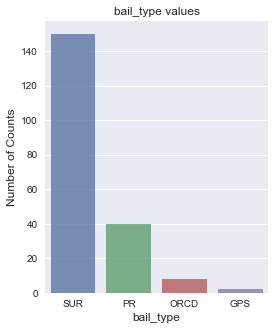

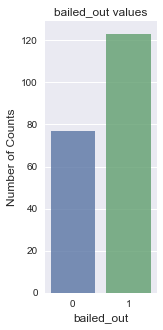

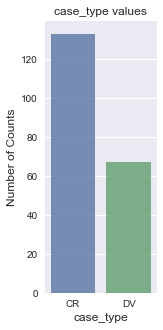

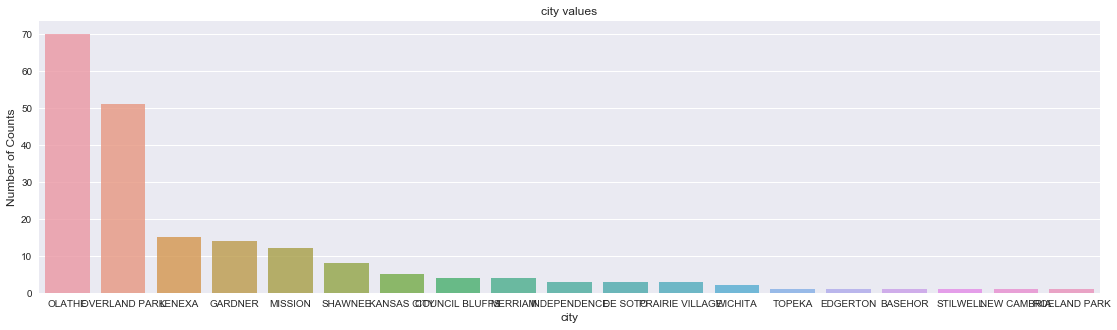

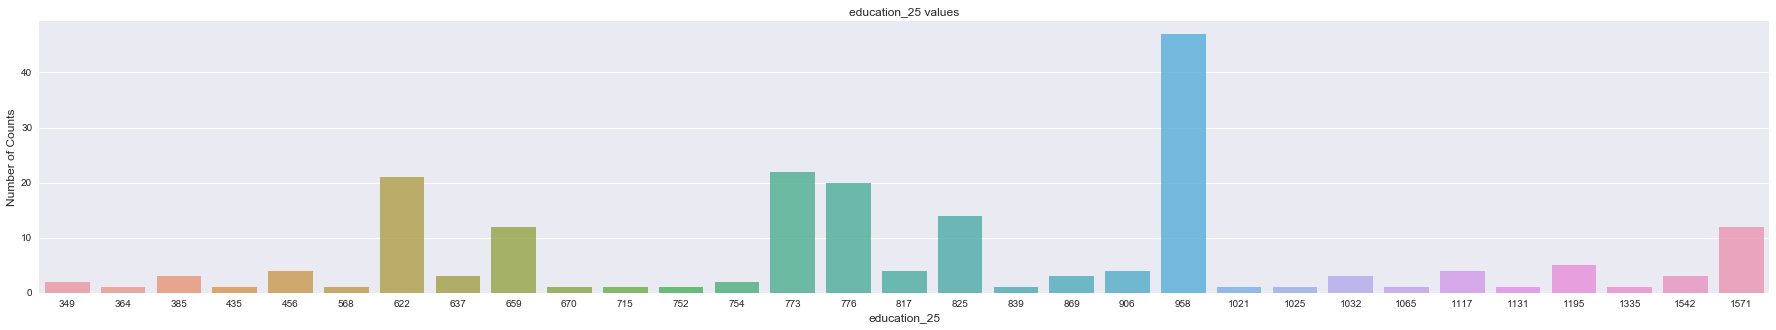

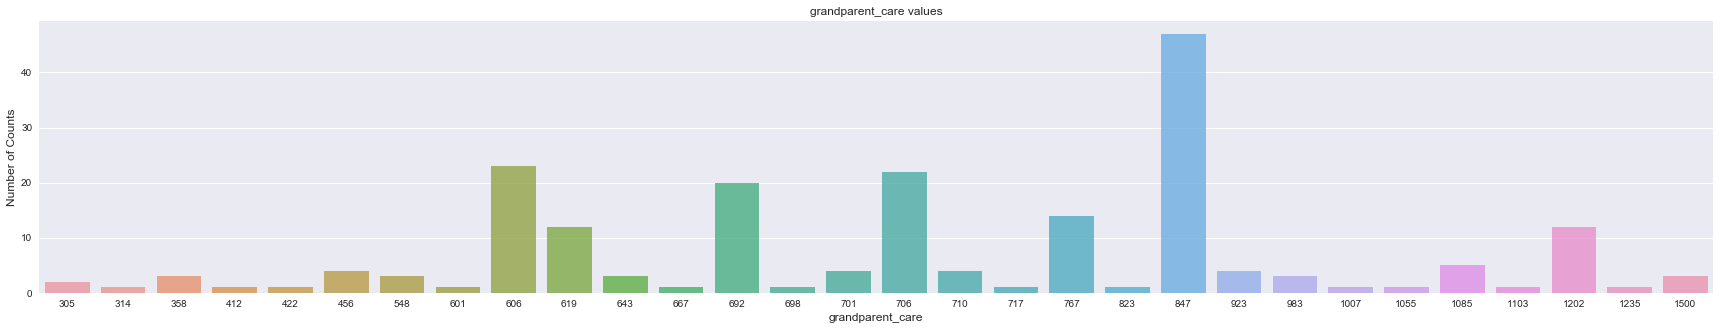

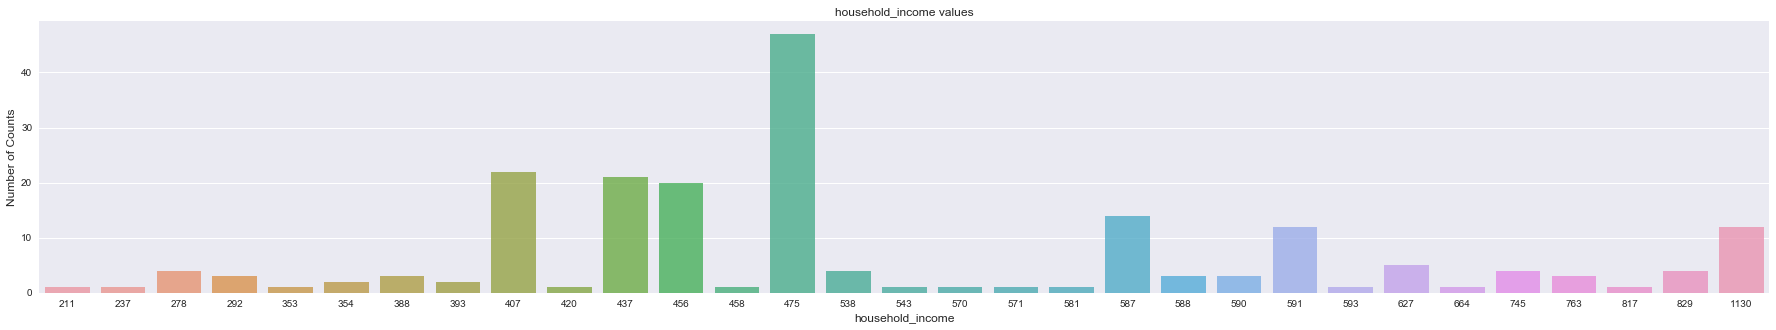

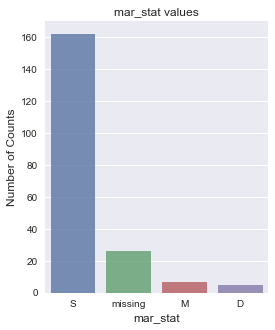

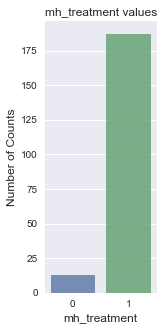

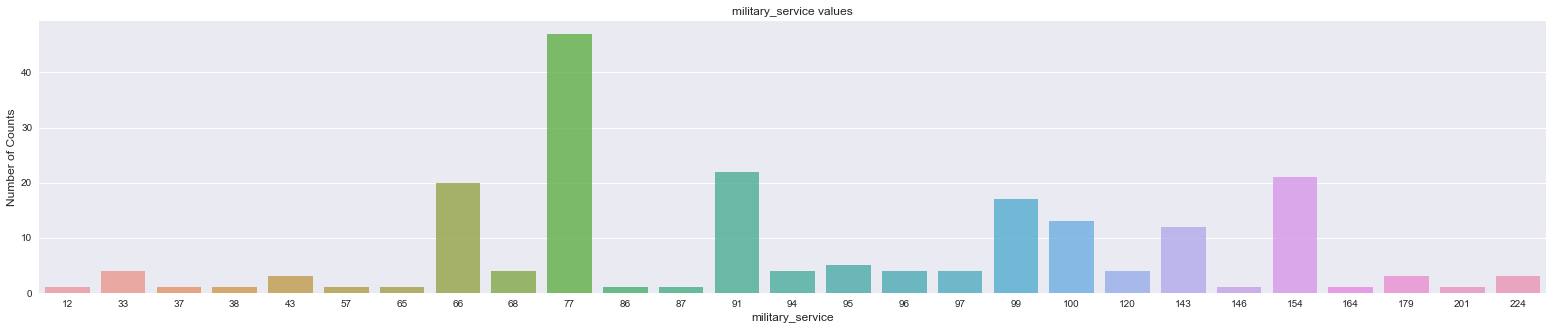

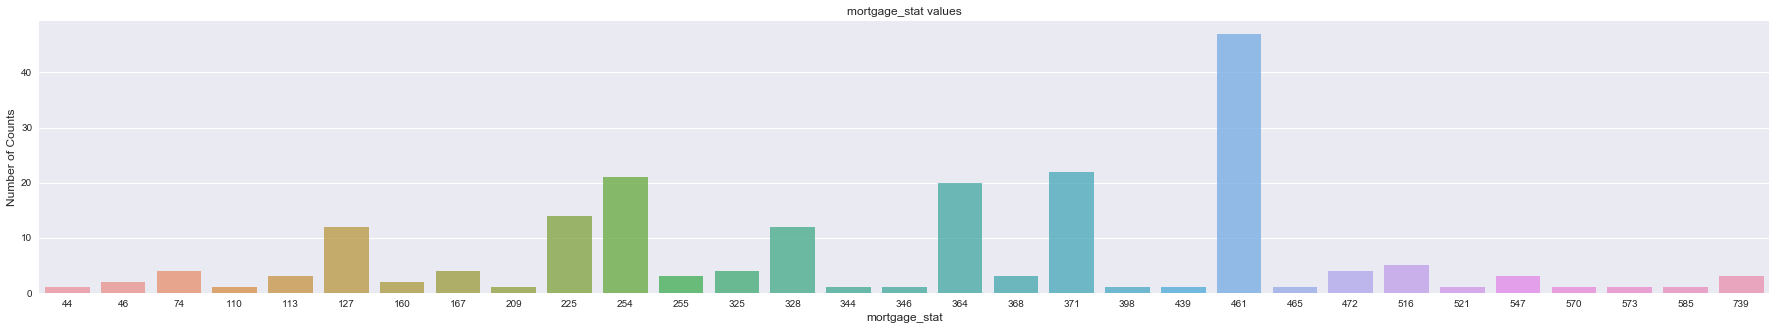

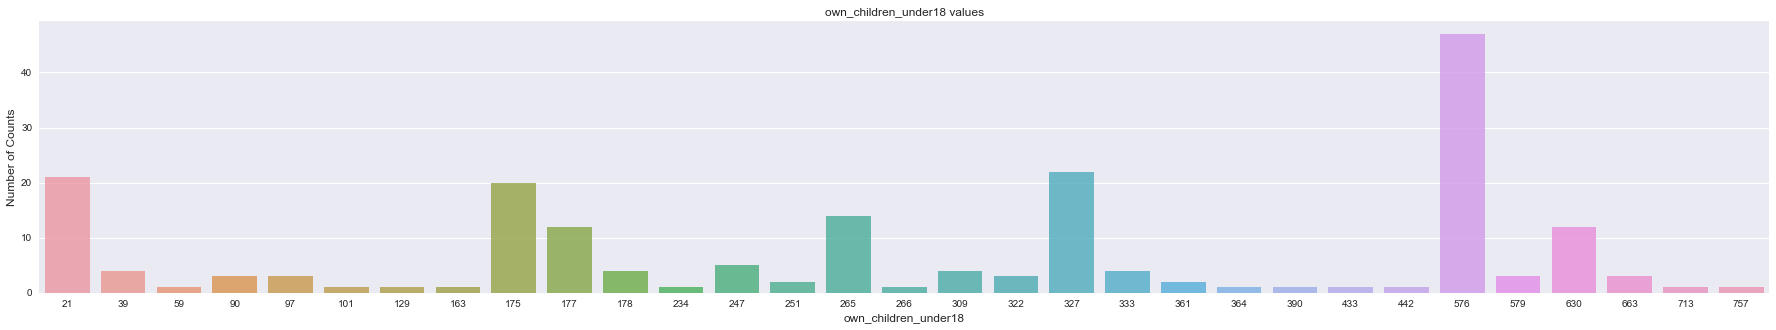

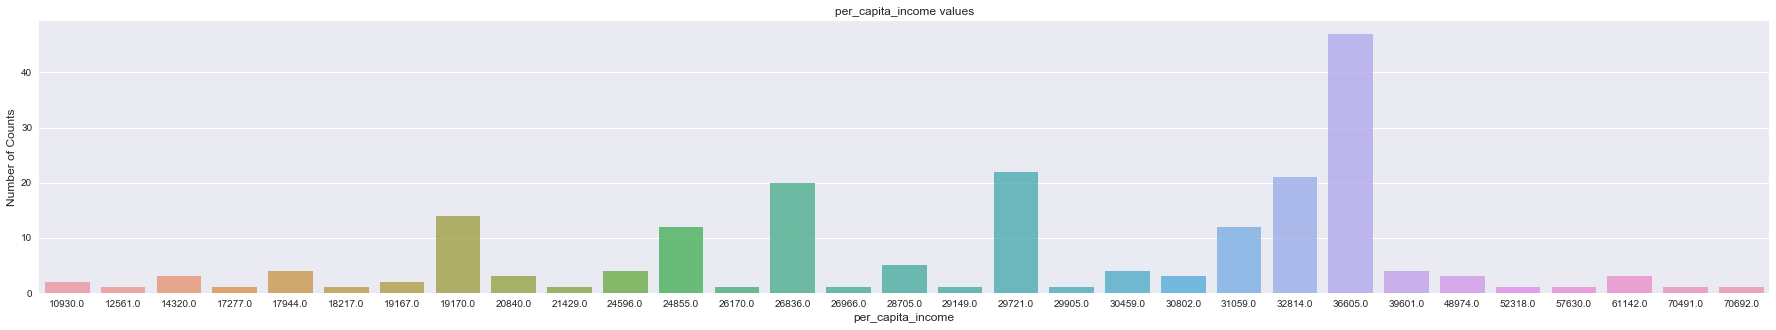

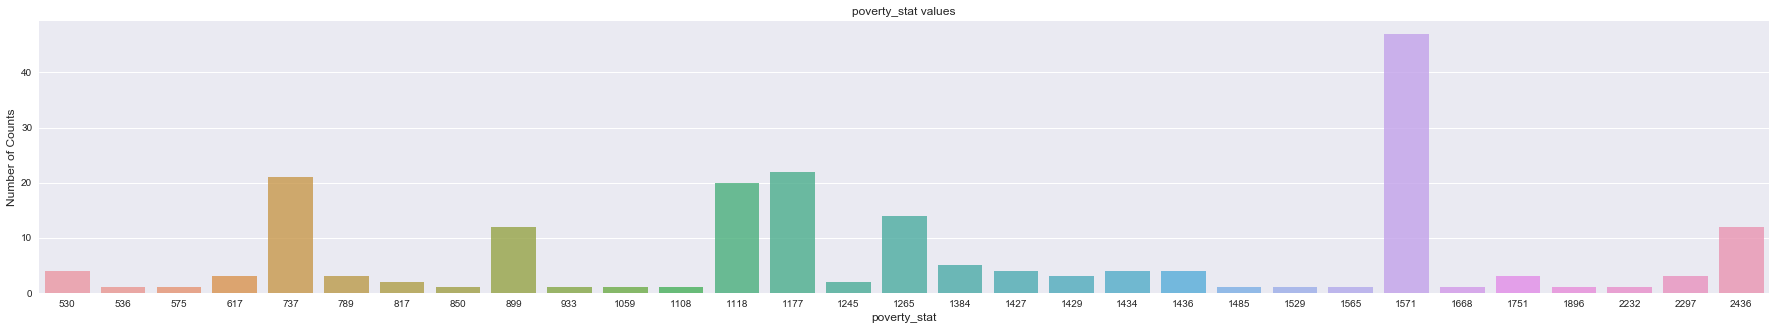

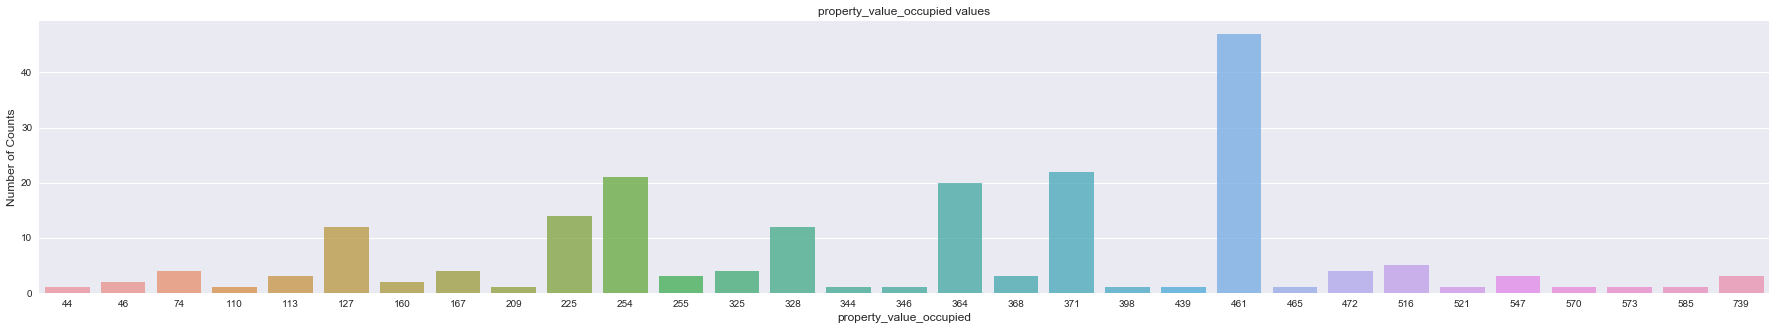

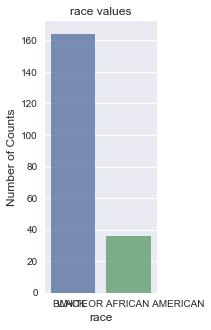

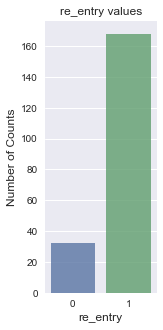

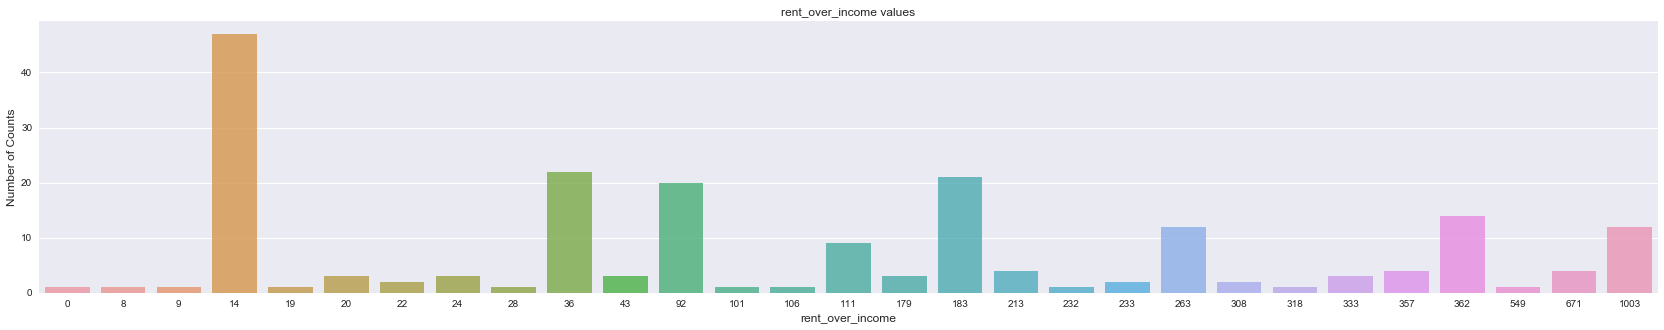

In [30]:
final_plot.plot_df(RF_df2[:200], features_to_see, save=False)

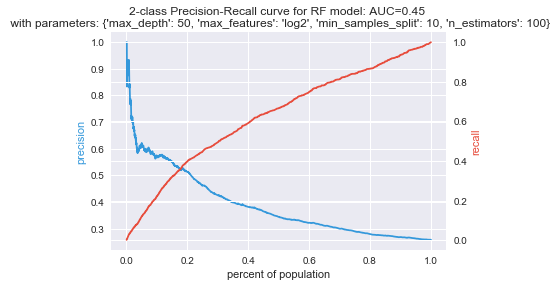

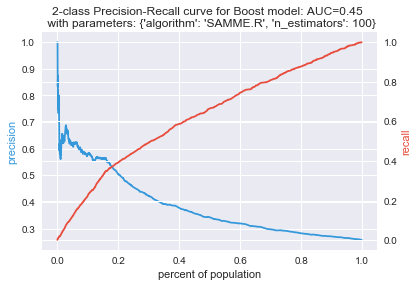

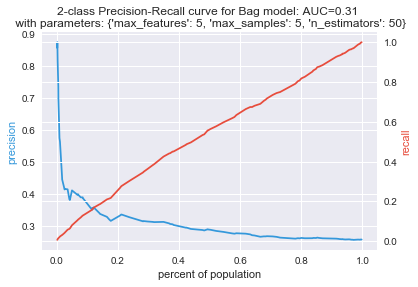

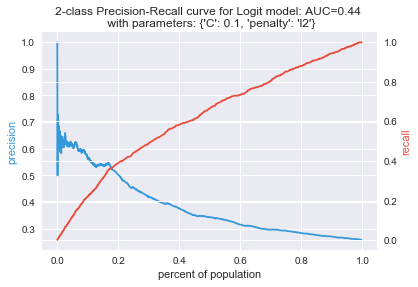

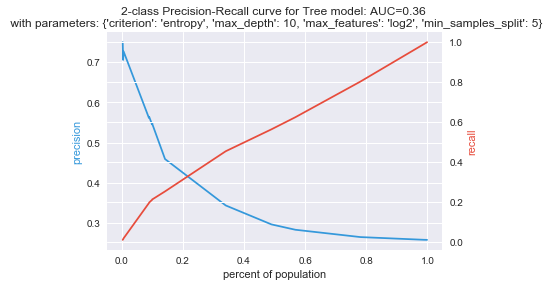

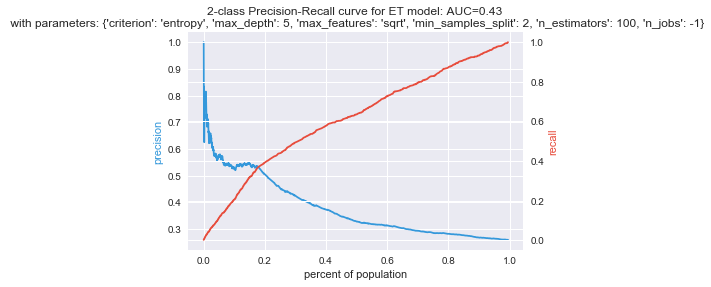

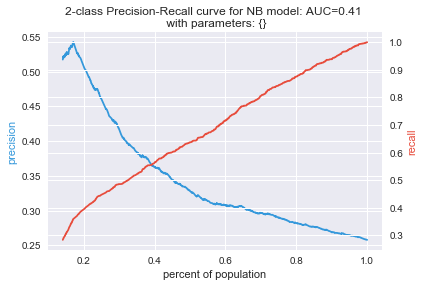

In [31]:
final_plot.plot_best(["RF", "Boost", "Bag", "Logit", "Tree", "ET", "NB"],  x_train, x_test, y_train['within_two'], y_test['within_two'], best)

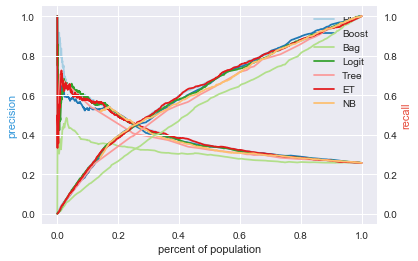

In [32]:
final_plot.plot_mult(['RF', 'Boost', 'Bag', 'Logit', 'Tree', 'ET', 'NB'], x_train, x_test, y_train['within_two'], y_test['within_two'], best2)

Feature ranking for within_two
1. mh_treatment (0.144395)
2. refferal_sourceOTHERS (0.098169)
3. pri_dx_valueUNSPECIFIED AFFECTIVE PSYCHOSIS (0.097350)
4. refferal_sourceSELF (0.039947)
5. age_bin1 (0.029708)
6. mar_statS (0.023878)
7. age_bin4 (0.022010)
8. mar_statM (0.021645)
9. sexFEMALE (0.020627)
10. sexMALE (0.020607)
11. age_bin3 (0.020159)
12. age_bin2 (0.019555)
13. raceWHITE (0.017449)
14. raceBLACK OR AFRICAN AMERICAN (0.016930)
15. mar_statmissing (0.016144)
16. mar_statD (0.013389)
17. pri_dx_valuemissing (0.012170)
18. pri_dx_valueDEPRESSIVE DISORDER NOS (0.009987)
19. pri_dx_valueMANIC DEPRESSIVE PSYCHOSIS, UNSPECIFIED (0.008764)
20. per_capita_income_bin1 (0.007927)


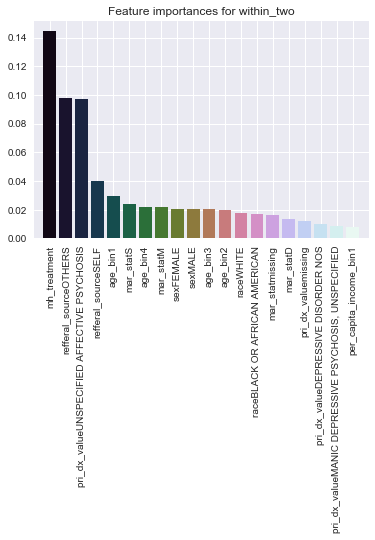

In [33]:
final_plot.feature_importance(x_train, y_train['within_two'], best2, "ET", 20)

In [34]:
################Print out the Decision Tree####################

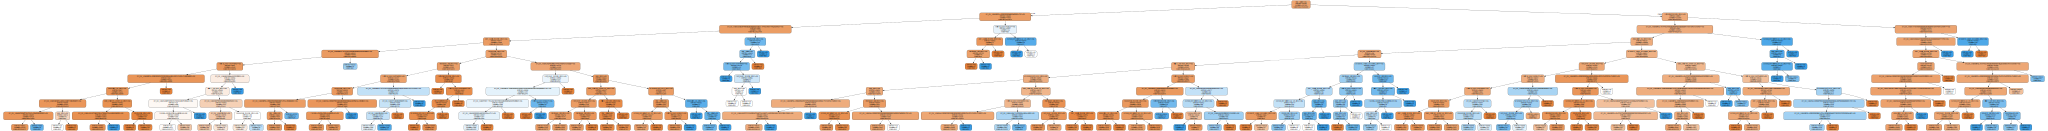

In [35]:
final_plot.print_tree(x_train, y_train["within_one"], best)

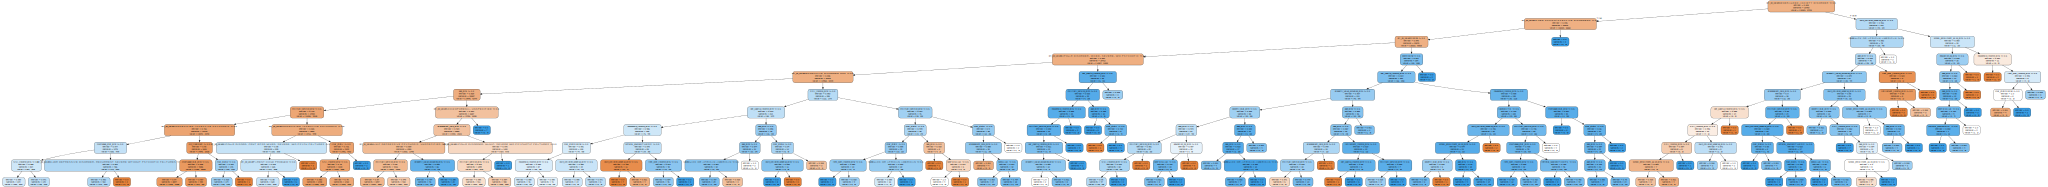

In [36]:
final_plot.print_tree(x_train, y_train["within_two"], best2)